In [1]:
import os          
import cv2
import netron
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from matplotlib import pyplot
from datetime import datetime      
import matplotlib.pyplot as plt 
from ann_visualizer.visualize import ann_viz
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as model_selection

%load_ext tensorboard
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


2022-12-20 16:11:39.170129: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-20 16:11:39.515291: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ragu/anaconda3/lib/python3.7/site-packages/cv2/../../lib64:
2022-12-20 16:11:39.515315: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-20 16:11:40.697632: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerr

In [2]:
def load_data(dataset):
    class_names = []
    images = []
    labels = []  
    for folder in os.listdir(dataset):
        class_names.append(folder)    
    class_names_label = {class_name:i for i, class_name in enumerate(class_names)} 
    print("Loading Dataset {}".format(dataset))
    for folder in os.listdir(dataset):
        label = class_names_label[folder]
        for file in tqdm(os.listdir(os.path.join(dataset, folder))):
            img_path = os.path.join(os.path.join(dataset, folder), file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            IMAGE_SIZE = (150, 150)
            image = cv2.resize(image, IMAGE_SIZE)
            images.append(image)
            labels.append(label)
    return images, labels , class_names

In [3]:
dataset = '/home/ragu/DATASETS/TEMP/'
images, labels, class_names = load_data(dataset)

Loading Dataset /home/ragu/DATASETS/TEMP/


100%|█████████████████████████████████████████████| 9/9 [00:00<00:00, 29.97it/s]


In [4]:
images = np.array(images, dtype = 'float32')
labels = np.array(labels, dtype = 'int32') 

In [5]:
images = images/255.0

In [6]:
train_images, test_images, train_labels, test_labels = model_selection.train_test_split(images, labels, train_size=0.80,test_size=0.20, random_state=101) 

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(30, activation=tf.nn.softmax)
])

2022-12-20 16:13:34.472152: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 16:13:34.472527: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ragu/anaconda3/lib/python3.7/site-packages/cv2/../../lib64:
2022-12-20 16:13:34.472634: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ragu/anaconda3/lib/python3.7/site-packages/cv2/../../lib64:
2022-12-20 16:13:34.472707: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not lo

In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels, batch_size=128, epochs = 50, validation_split = 0.2,callbacks=[tensorboard_callback])

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 3.3992 - accuracy: 0.0000e+00 - val_loss: 3.0933 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 3.0770 - accuracy: 0.4545 - val_loss: 2.3218 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 2.2831 - accuracy: 0.3636 - val_loss: 1.4836 - val_accuracy: 0.1667
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 1.4262 - accuracy: 0.3182 - val_loss: 1.4121 - val_accuracy: 0.1667
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 1.2973 - accuracy: 0.3636 - val_loss: 1.2356 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 1.1691 - accuracy: 0.5000 - val_loss: 1.1928 - val_accuracy: 0.1667
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 1.1106 - accuracy: 0.3636 - val_loss: 1.2445 - val_accuracy: 0.5000
Epoch 8/50
1/1 [=====================

In [10]:
model.evaluate(test_images, test_labels)

1/1 [==============================] - 0s 59ms/step - loss: 0.0196 - accuracy: 1.0000


[0.019619228318333626, 1.0]

In [11]:
def plot_accuracy_loss(history):
    y = ['accuracy','loss']
    for x in y:
        plt.plot(history.history[x],color='orange', label = x )
        plt.plot(history.history['val_'+x], color='lime', label ='val_'+x)
        plt.title("train_"+x + " vs val_"+x)
        plt.ylabel(x)
        plt.xlabel("epochs")
        plt.legend()
        plt.show()

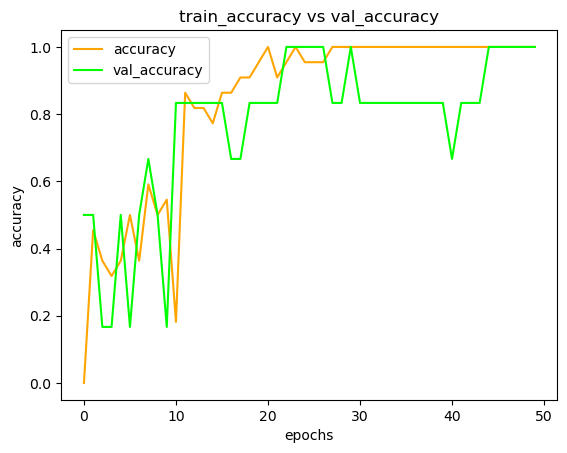

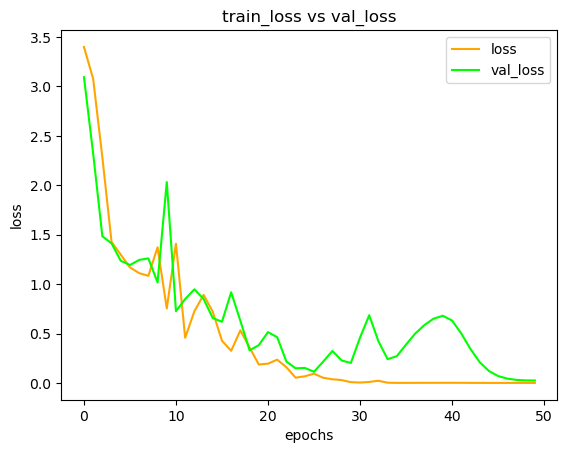

In [12]:
plot_accuracy_loss(history)

In [13]:
def measures(y_actual, y_pred):
    
    confusion_matrix_df = pd.DataFrame(confusion_matrix(actual,predictions),index = class_names, columns =class_names)

    FP = confusion_matrix_df.sum(axis=0) - np.diag(confusion_matrix_df) 
    FN = confusion_matrix_df.sum(axis=1) - np.diag(confusion_matrix_df)
    TP = np.diag(confusion_matrix_df)
    TN = confusion_matrix_df.sum() - (FP + FN + TP)
    NPV = TN/(TN+FN)
    FDR = FP/(TP+FP)
    FNR = FP/(FP+TN)
    Accuracy = (TP + TN) / (TP + FP + FN + TN)
    Error_rate = (FP + FN) / (TP + FP + FN + TN)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN )
    F_measure = (2 * Recall * Precision) / (Recall + Precision)
    Fall_out = FN/(TP+FN)
    Specificity = TN/(TN+FP)
    
    dict = {}
    dict['class_name'] = class_names
    dict['TP'] = TP
    dict['FP'] = FP
    dict['TN'] = TN
    dict['FN'] = FN
    dict['NPV'] = NPV
    dict['FDR'] = FDR
    dict['FNR'] = FNR
    dict['Accuracy'] = Accuracy
    dict['Error_rate'] = Error_rate
    dict['Precision'] = Precision
    dict['Recall'] = Recall
    dict['F_measure'] = F_measure
    dict['Fall_out'] = Fall_out
    dict['Specificity'] = Specificity
    
    measures = pd.DataFrame(dict)

    plt.figure(figsize=(15,15))
    sns.heatmap(confusion_matrix_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    print(measures)
    
predictions = np.argmax(model.predict(test_images), axis = 1)
actual = test_labels
measures(actual, predictions)

1/1 [==============================] - 0s 123ms/step


ValueError: Shape of passed values is (3, 3), indices imply (4, 4)

In [ ]:
model.summary()

In [ ]:
import visualkeras
visualkeras.layered_view(model, legend=True) 


In [ ]:
dot_img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir}

In [ ]:
ann_viz(model, title="RRNET8")

In [ ]:
model_name = 'RRNET8.h5'
model.save(model_name)
netron.start(model_name, 8081)

In [ ]:
for layer in model.layers:
    
    if 'conv' not in layer.name:
        continue    
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

In [ ]:
weights = model.get_layer("conv2d").get_weights()[1]
plt.figure(figsize=(15,7))
sns.barplot(x=np.arange(len(weights)), y=weights)
plt.show()

In [ ]:
bias = model.get_layer("dense").get_weights()[1]
plt.figure(figsize=(15,7))
sns.barplot(x=np.arange(len(bias)), y=bias)
plt.show()

In [ ]:
weights = model.get_layer('dense_1').get_weights()[0]
sns.distplot(weights)
plt.show()

In [ ]:
feature_maps = tf.keras.models.Model(model.input, model.get_layer('conv2d').output)
feature_maps.summary()

In [ ]:
filters , bias = model.layers[1].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters =6
ix=1
fig = pyplot.figure(figsize=(20,15))
for i in range(n_filters):
    
    f = filters[:,:,:,i]
    for j in range(3):
       
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j] ,cmap='gray')
        ix+=1

pyplot.show()

In [ ]:

blocks = [ ] 
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)
    blocks.append(i)

In [ ]:
outputs = [model.layers[i].output for i in blocks]

model = tf.keras.models.Model( inputs= model.inputs, outputs = outputs)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import  img_to_array 
from matplotlib import pyplot
from numpy import expand_dims

model = VGG16()

model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

img = load_img('bird.jpg', target_size=(224, 224))

img = img_to_array(img)

img = expand_dims(img, axis=0)

img = preprocess_input(img)

feature_maps = model.predict(img)

square = 8
ix = 1
for _ in range(square):

 ax = pyplot.subplot(square, square, ix)
 ax.set_xticks([])
 ax.set_yticks([])

 pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
 ix += 1

pyplot.show()

In [ ]:
https://data.world/datasets/dna